<a href="https://colab.research.google.com/github/Valtern/PCVK_Ganjil_2025/blob/main/week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import google.colab.drive

google.colab.drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from skimage import io
import os
import glob
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Part A

1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya

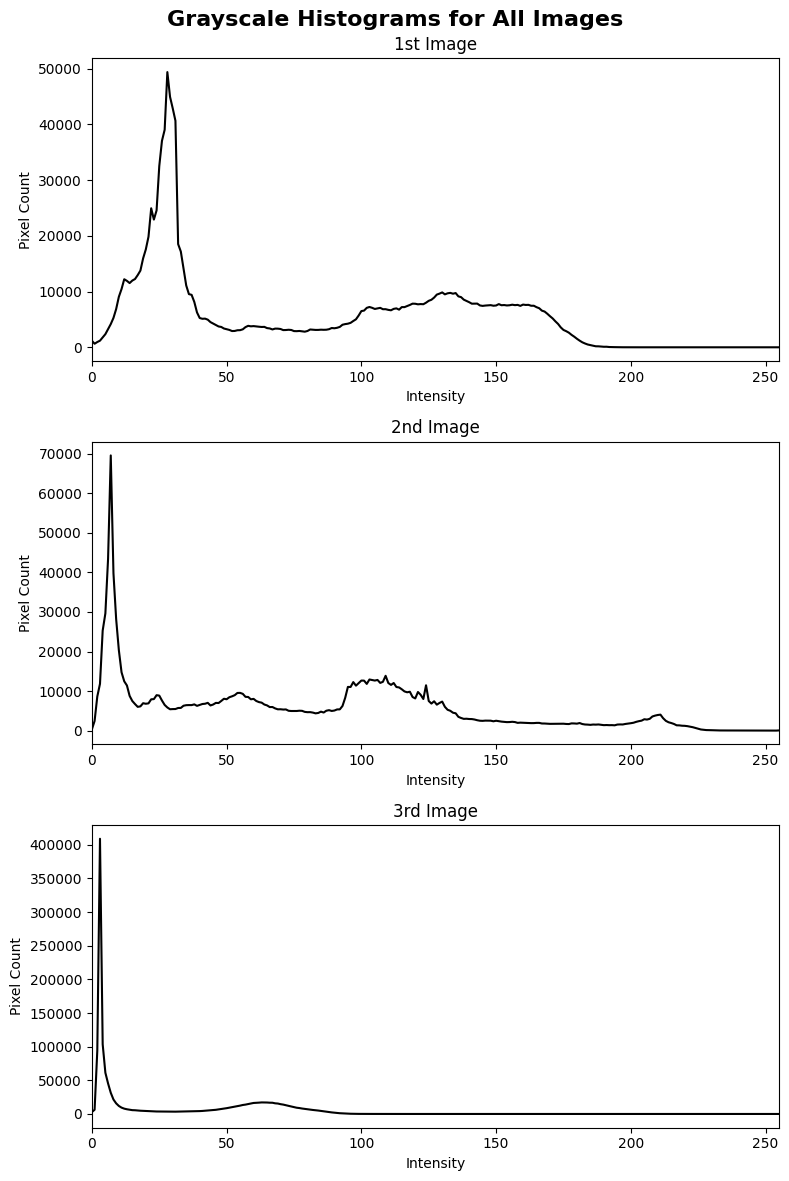

In [3]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/img1fnormal.jpeg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/img2fhalfbrighthalfdark.jpeg', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/img3fdark.jpeg', cv.IMREAD_GRAYSCALE)

images = [img1, img2, img3]
titles = ['1st Image', '2nd Image', '3rd Image']

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Grayscale Histograms for All Images', fontsize=16, fontweight='bold')

for i, img in enumerate(images):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])

    axs[i].plot(hist, color='black')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Intensity')
    axs[i].set_ylabel('Pixel Count')
    axs[i].set_xlim([0, 255])

plt.tight_layout()
plt.show()

2. Terapkan transformasi brightness dan contrast (linear/log brightness).

o Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural

Enter value of alpha: 1.3
Enter value of beta: 20


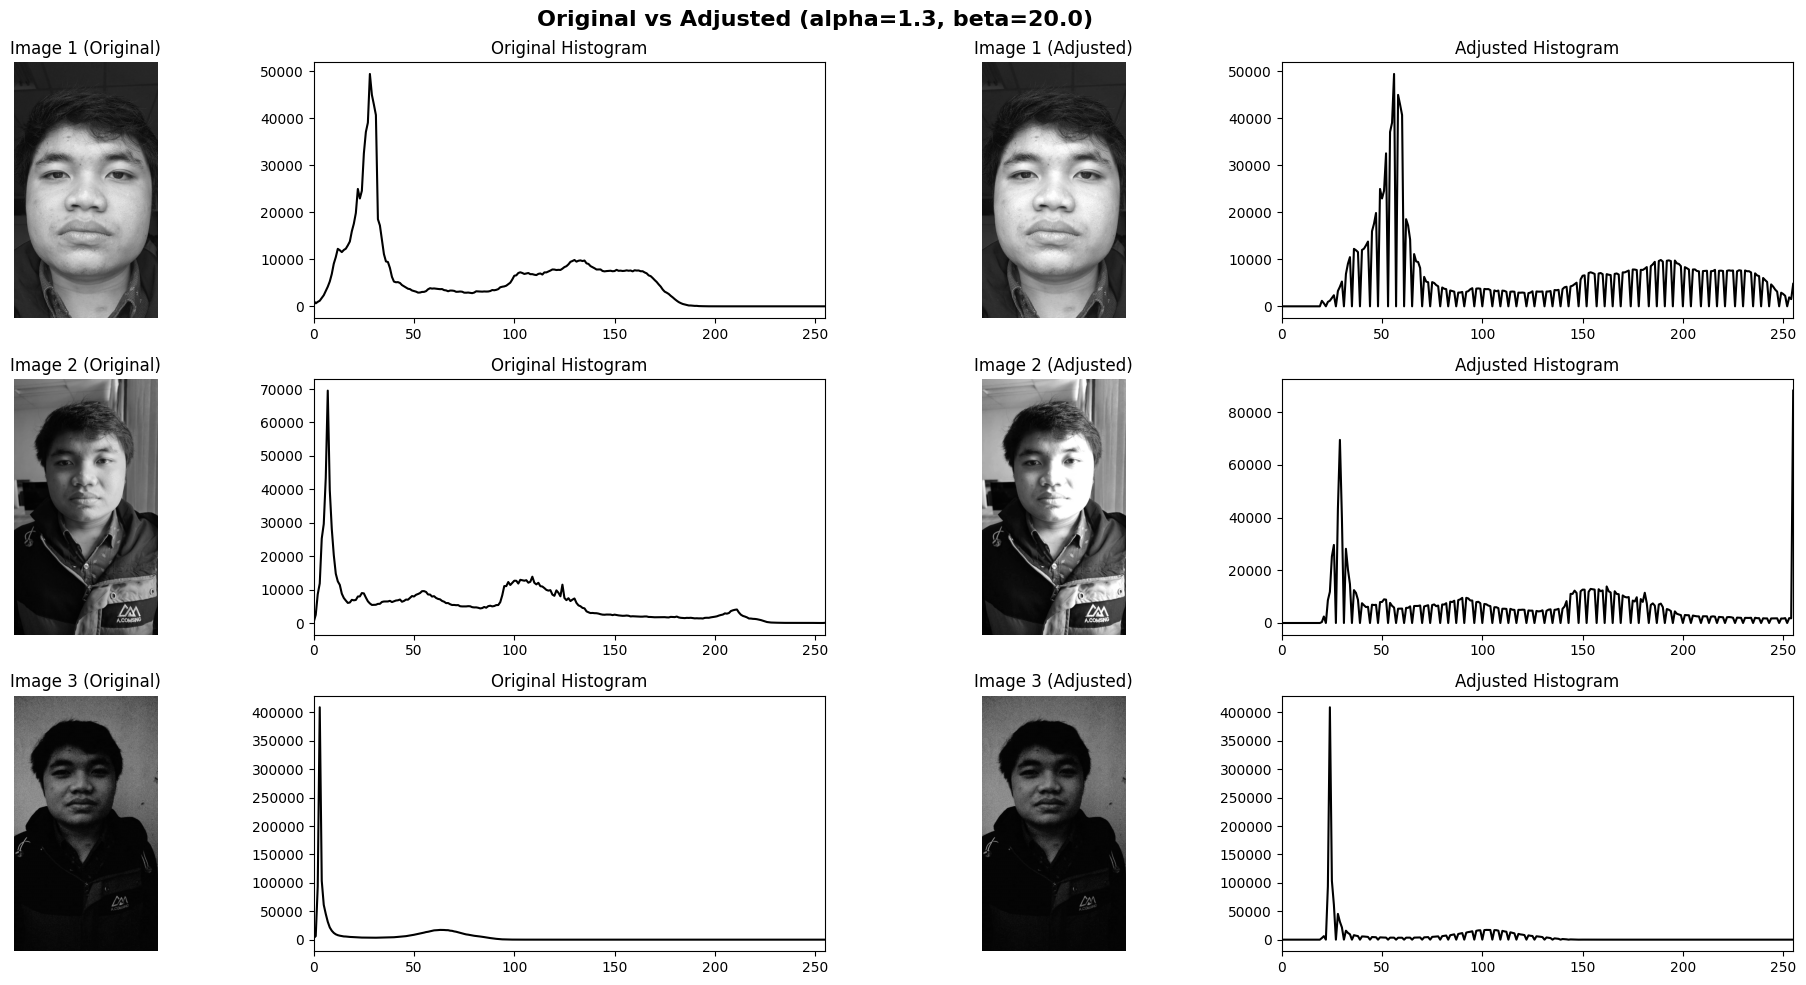

In [4]:
listImg = [img1, img2, img3]
titles = ['Image 1', 'Image 2', 'Image 3']

try:
    alpha = float(input("Enter value of alpha: "))
    beta = float(input("Enter value of beta: "))
except ValueError:
    print("Error, not a number")

adjusted_Imglist = []
for img in listImg:
    adjusted = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
    adjusted_Imglist.append(adjusted)


fig, axs = plt.subplots(len(listImg), 4, figsize=(20, 10))
fig.suptitle(f'Original vs Adjusted (alpha={alpha}, beta={beta})', fontsize=16, fontweight='bold')

for i in range(len(listImg)):
    axs[i, 0].imshow(listImg[i], cmap='gray')
    axs[i, 0].set_title(titles[i] + ' (Original)')
    axs[i, 0].axis('off')

    hist_orig = cv.calcHist([listImg[i]], [0], None, [256], [0, 256])
    axs[i, 1].plot(hist_orig, color='black')
    axs[i, 1].set_title('Original Histogram')
    axs[i, 1].set_xlim([0, 255])

    axs[i, 2].imshow(adjusted_Imglist[i], cmap='gray')
    axs[i, 2].set_title(titles[i] + ' (Adjusted)')
    axs[i, 2].axis('off')

    hist_adj = cv.calcHist([adjusted_Imglist[i]], [0], None, [256], [0, 256])
    axs[i, 3].plot(hist_adj, color='black')
    axs[i, 3].set_title('Adjusted Histogram')
    axs[i, 3].set_xlim([0, 255])

plt.tight_layout()
plt.show()

3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.

o Bandingkan hasil visual dan histogram sebelum–sesudah.

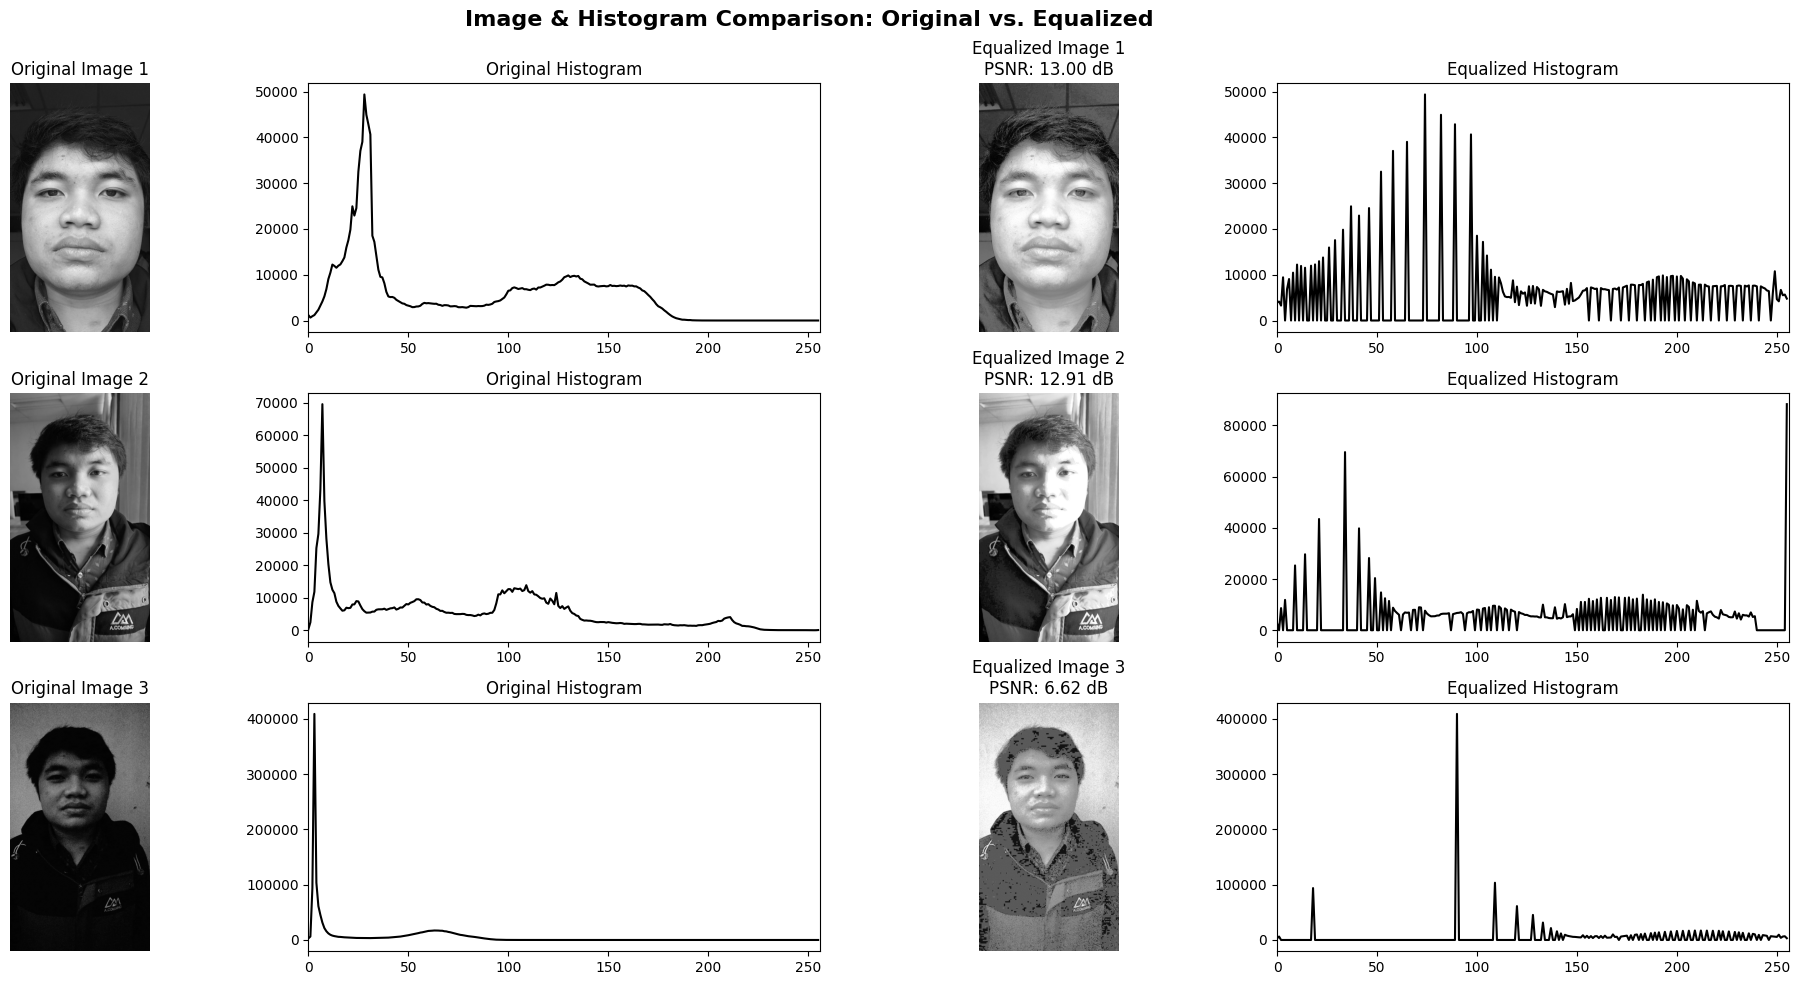

In [5]:
equalized_Imglist = []
for img in adjusted_Imglist:
    equalizedImg = cv.equalizeHist(img)
    equalized_Imglist.append(equalizedImg)

fig, axs = plt.subplots(len(listImg), 4, figsize=(20, 10))
fig.suptitle('Image & Histogram Comparison: Original vs. Equalized', fontsize=16, fontweight='bold')

for i in range(len(listImg)):
    psnrval = cv.PSNR(listImg[i], equalized_Imglist[i])

    axs[i, 0].imshow(listImg[i], cmap='gray')
    axs[i, 0].set_title(f'Original {titles[i]}')
    axs[i, 0].axis('off')

    hist_original = cv.calcHist([listImg[i]], [0], None, [256], [0, 256])
    axs[i, 1].plot(hist_original, color='black')
    axs[i, 1].set_title('Original Histogram')
    axs[i, 1].set_xlim([0, 256])

    axs[i, 2].imshow(equalized_Imglist[i], cmap='gray')
    axs[i, 2].set_title(f'Equalized {titles[i]}\nPSNR: {psnrval:.2f} dB')
    axs[i, 2].axis('off')

    hist_equalized = cv.calcHist([equalized_Imglist[i]], [0], None, [256], [0, 256])
    axs[i, 3].plot(hist_equalized, color='black')
    axs[i, 3].set_title('Equalized Histogram')
    axs[i, 3].set_xlim([0, 256])

plt.tight_layout()
plt.show()

4.  Terapkan filter spasial:

o Low-pass filter untuk menghaluskan noise kulit wajah.

o High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir

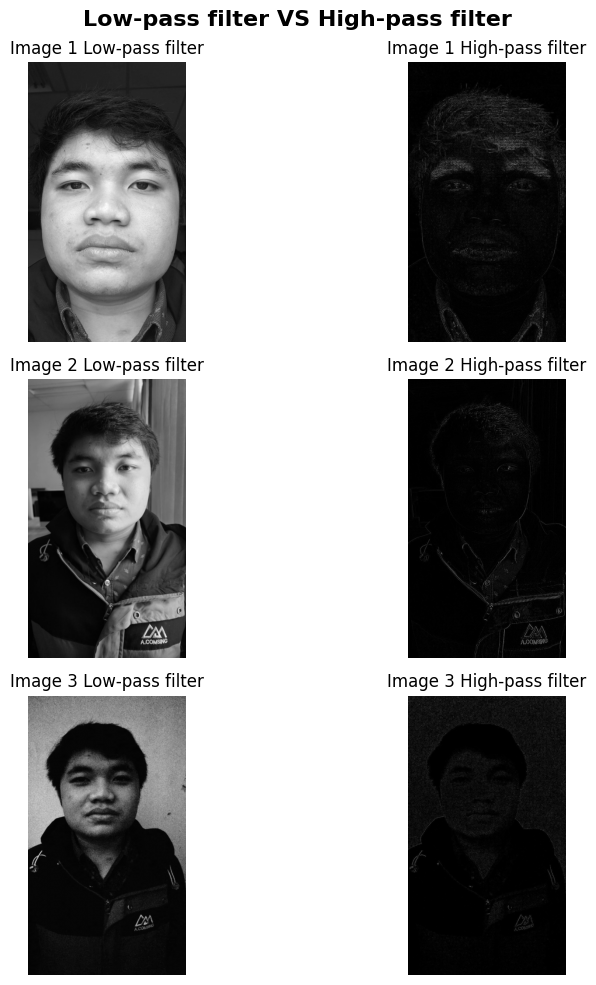

In [6]:
kernel = np.ones((3, 3), np.float32) / 9

smoothed_Imglist = []
for img in listImg:
    smoothedImg = cv.filter2D(img, -1, kernel)
    smoothed_Imglist.append(smoothedImg)


kernelHP = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])


sharpened_Imglist = []
for i in range(len(listImg)):
    sharpenedImg = cv.filter2D(listImg[i], -1, kernelHP)
    sharpened_Imglist.append(sharpenedImg)


fig, axs = plt.subplots(len(equalized_Imglist), 2, figsize=(10, 10))
fig.suptitle('Low-pass filter VS High-pass filter', fontsize=16, fontweight='bold')
for i in range(len(listImg)):
  axs[i, 0].imshow(smoothed_Imglist[i], cmap='gray')
  axs[i, 0].set_title('Image ' + str(i+1) + ' Low-pass filter')
  axs[i, 0].axis('off')

  axs[i, 1].imshow(sharpened_Imglist[i], cmap='gray')
  axs[i, 1].set_title('Image ' + str(i+1) + ' High-pass filter')
  axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna
wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi
wajah.

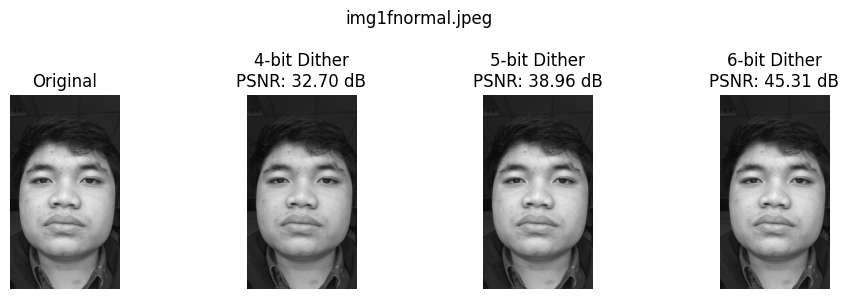

Image: img1fnormal.jpeg
PSNR (4-bit): 32.70 dB
PSNR (5-bit): 38.96 dB
PSNR (6-bit): 45.31 dB



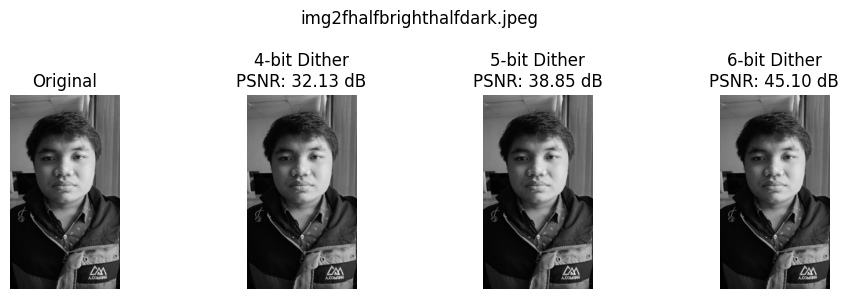

Image: img2fhalfbrighthalfdark.jpeg
PSNR (4-bit): 32.13 dB
PSNR (5-bit): 38.85 dB
PSNR (6-bit): 45.10 dB



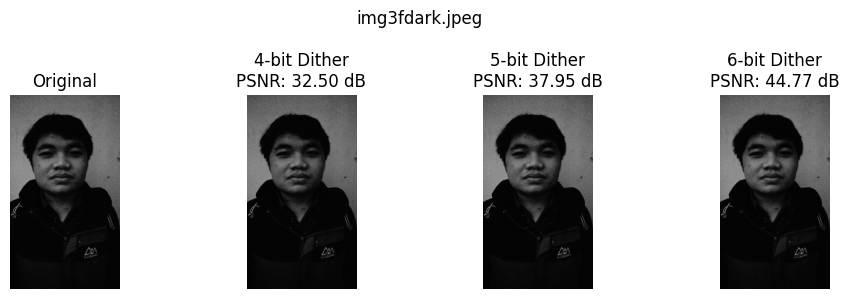

Image: img3fdark.jpeg
PSNR (4-bit): 32.50 dB
PSNR (5-bit): 37.95 dB
PSNR (6-bit): 44.77 dB



In [9]:
import math

photos = [
    '/content/drive/MyDrive/PCVK/Image/img1fnormal.jpeg',
    '/content/drive/MyDrive/PCVK/Image/img2fhalfbrighthalfdark.jpeg',
    '/content/drive/MyDrive/PCVK/Image/img3fdark.jpeg'
]

def floyd_steinberg(img, bit_depth):
    gray = img.astype(np.float32)
    levels = 2 ** bit_depth
    step = 256 // levels
    h, w = gray.shape

    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = gray[y, x]
            new_pixel = np.round(old_pixel / step) * step
            gray[y, x] = new_pixel
            error = old_pixel - new_pixel

            gray[y,   x+1] += error * 7/16
            gray[y+1, x-1] += error * 3/16
            gray[y+1, x  ] += error * 5/16
            gray[y+1, x+1] += error * 1/16

    return np.clip(gray, 0, 255).astype(np.uint8)

def calculate_psnr(original, processed):
    mse = np.mean((original.astype(np.float32) - processed.astype(np.float32)) ** 2)
    psnr = 10 * math.log10((255 ** 2) / mse)
    return psnr

for path in photos:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    dithered_6bit = floyd_steinberg(img, 6)
    dithered_5bit = floyd_steinberg(img, 5)
    dithered_4bit = floyd_steinberg(img, 4)

    psnr_6bit = calculate_psnr(img, dithered_6bit)
    psnr_5bit = calculate_psnr(img, dithered_5bit)
    psnr_4bit = calculate_psnr(img, dithered_4bit)

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(dithered_4bit, cmap='gray')
    plt.title(f'4-bit Dither\nPSNR: {psnr_4bit:.2f} dB')
    plt.axis('off')


    plt.subplot(1, 4, 3)
    plt.imshow(dithered_5bit, cmap='gray')
    plt.title(f'5-bit Dither\nPSNR: {psnr_5bit:.2f} dB')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(dithered_6bit, cmap='gray')
    plt.title(f'6-bit Dither\nPSNR: {psnr_6bit:.2f} dB')
    plt.axis('off')

    plt.suptitle(path.split('/')[-1])
    plt.tight_layout()
    plt.show()

    print(f"Image: {path.split('/')[-1]}")
    print(f"PSNR (4-bit): {psnr_4bit:.2f} dB")
    print(f"PSNR (5-bit): {psnr_5bit:.2f} dB")
    print(f"PSNR (6-bit): {psnr_6bit:.2f} dB\n")